In [6]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1) RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2) CustomerId — идентификатор клиента
3) Surname — фамилия клиента
4) CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5) Geography — страна клиента (банк международный)
6) Gender — пол клиента
7) Age — возраст клиента
8) Tenure — сколько лет клиент пользуется услугами банка
9) Balance — баланс на счетах клиента в банке
10) NumOfProducts — количество услуг банка, которые приобрёл клиент
11) HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12) IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13) EstimatedSalary — предполагаемая заработная плата клиента
14) Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

### <center>***Фронт работы***

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Для наглядного соотношения ушедших и лояльных клиентов необходимо построить 
круговую диаграмму

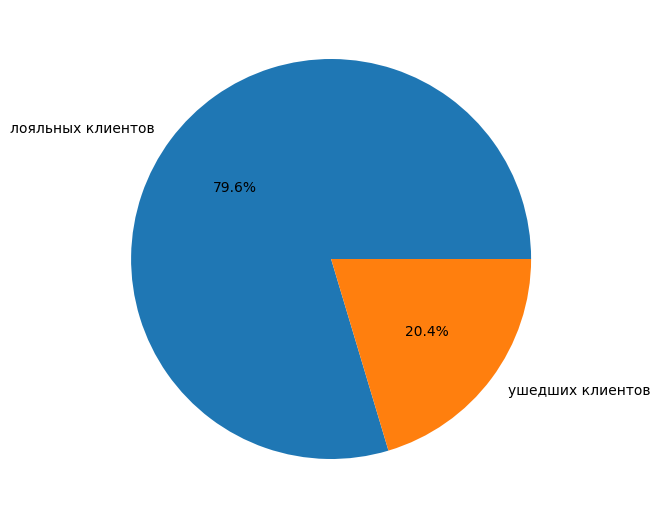

In [5]:
#Создаём переменну с котегореальным признаком ушедших(лояльных клиентов)
exited = churn_data['Exited']

#создаём пустой словарь
ratio_dict = {}
#создаём счётчики для ушедхих клиентов 
count_0 = 0
#создаём счётчики для лояльных клиентов
count_1 = 0

#Создаём цикл в котором будем считать ушедших клиентов и лояльных клиентов
for i in exited:
    if i == 0:
        count_0 +=1
    if i == 1:
        count_1 +=1
#помещаем в словарь полученные результаты
ratio_dict = {'лояльных клиентов': count_0,
    'ушедших клиентов' : count_1}
#преобразуем в формат Series           
ratio = pd.Series(ratio_dict).sort_values(ascending=False)


fig = plt.figure(figsize=(5, 5))
exefer = fig.add_axes([0, 0, 1, 1])#add_axes() добавляется координатная плоскость с списком из координат.
#В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1)
exefer.pie(
    ratio,
    labels=ratio.index,
    autopct='%.1f%%',
);


Из данного графика видно что соотношение ушедших клиентов(20,4%) и лояльных клиентов(79,6%) равна 4. То есть лояльных клиентов почти в 4 раза больше чем ушедших клиентов

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Для наглядного необходимо построить boxplot